<a href="https://colab.research.google.com/github/Salah-Mo-hammed/Prediction_of_Product_Sales/blob/main/project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import basic libraires
from sklearn import set_config
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import preproccesing libraries
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder ,OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
# import models , metrices ,and GridSearchCv
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  accuracy_score, recall_score, precision_score,classification_report
from sklearn.metrics import classification_report
from sklearn.ensemble import BaggingClassifier ,RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE,SMOTENC
from sklearn.inspection import permutation_importance
# import cluster methods
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [ ]:
fpath='/content/drive/MyDrive/AXSOSACADEMY/AXSOSACADEMY/05-IntermediateML/Week17/Data/adult.csv'
df=pd.read_csv(fpath)
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## data cleaning

In [ ]:
df.duplicated().sum() # 52 dups

np.int64(52)

In [ ]:
df.isna().sum().sum() # no nulls

np.int64(0)

In [ ]:
test_cats=df.select_dtypes(include='object').columns
test_cats
for col in test_cats:
  print(df[col].value_counts())
  print('\n***********************************************************')
# no inconsistencies

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

***********************************************************
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

***********************************************************
marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse  

In [ ]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## visualize data

### EDA Funcs

In [ ]:
import seaborn as sns
"""UNIVARIATE PLOTTING FUNCTIONS FOR EDA"""
# Add the print statements to the function
def explore_categorical(df, x,hue, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order,hue=hue,stat='percent' )
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


# TO DO: add the new print statements from explore_categorical
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


In [ ]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='rating',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y,
                           figsize=(6,4),
                           ):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax,scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### Visualize categorical

********************Visualize workclass********************



/tmp/ipython-input-8-933707171.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


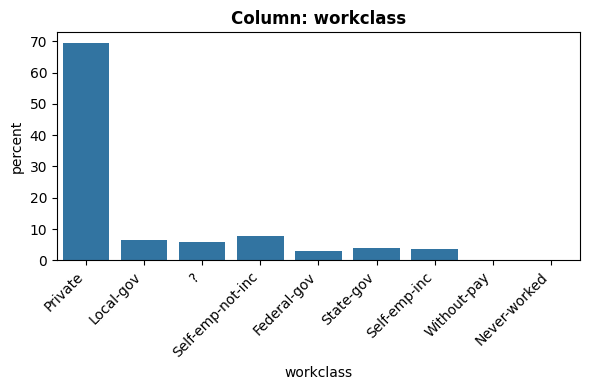

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: 'Private' occurs 33906 times (69.42%)
- Not constant or quasi-constant.
********************Visualize education********************



/tmp/ipython-input-8-933707171.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


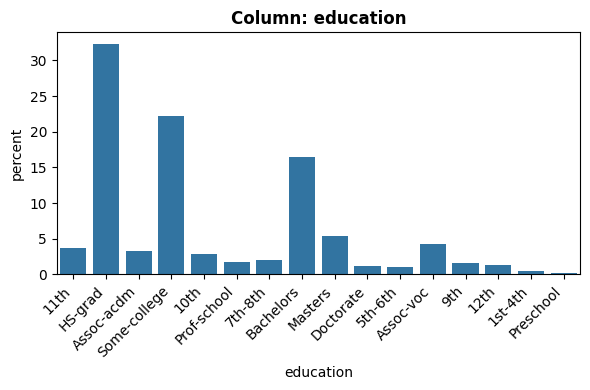

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'HS-grad' occurs 15784 times (32.32%)
- Not constant or quasi-constant.
********************Visualize marital-status********************



/tmp/ipython-input-8-933707171.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


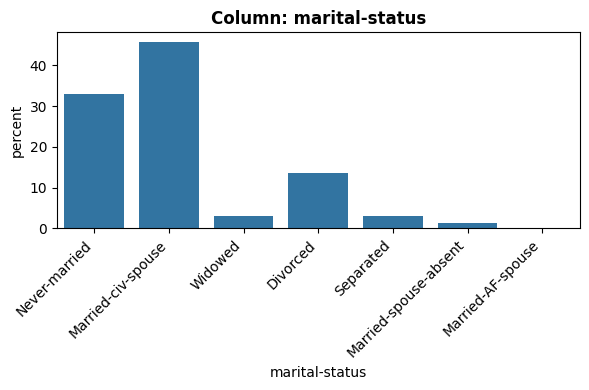

- NaN's Found: 0 (0.0%)
- Unique Values: 7
- Most common value: 'Married-civ-spouse' occurs 22379 times (45.82%)
- Not constant or quasi-constant.
********************Visualize occupation********************



/tmp/ipython-input-8-933707171.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


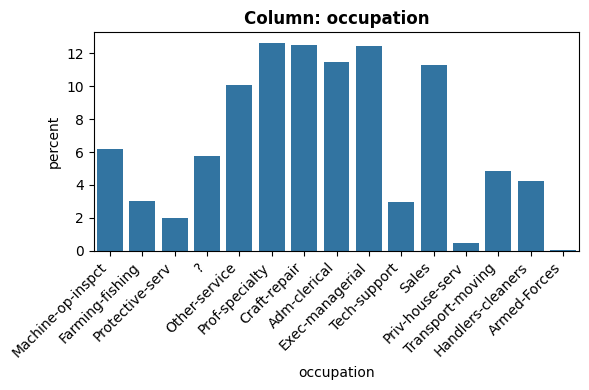

- NaN's Found: 0 (0.0%)
- Unique Values: 15
- Most common value: 'Prof-specialty' occurs 6172 times (12.64%)
- Not constant or quasi-constant.
********************Visualize relationship********************



/tmp/ipython-input-8-933707171.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


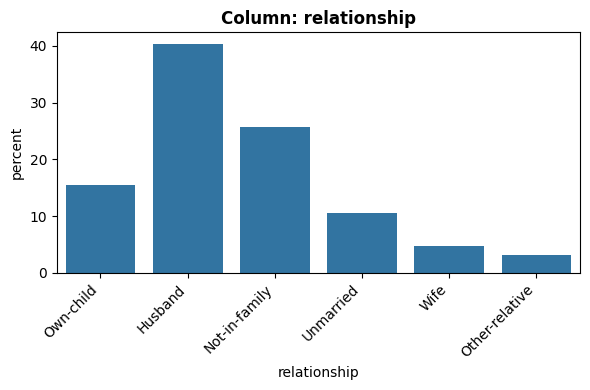

- NaN's Found: 0 (0.0%)
- Unique Values: 6
- Most common value: 'Husband' occurs 19716 times (40.37%)
- Not constant or quasi-constant.
********************Visualize race********************



/tmp/ipython-input-8-933707171.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


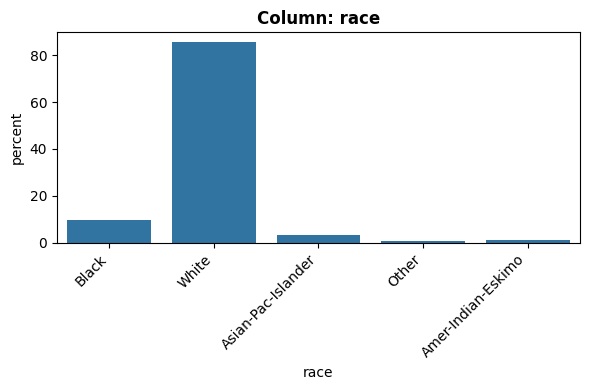

- NaN's Found: 0 (0.0%)
- Unique Values: 5
- Most common value: 'White' occurs 41762 times (85.5%)
- Not constant or quasi-constant.
********************Visualize gender********************



/tmp/ipython-input-8-933707171.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


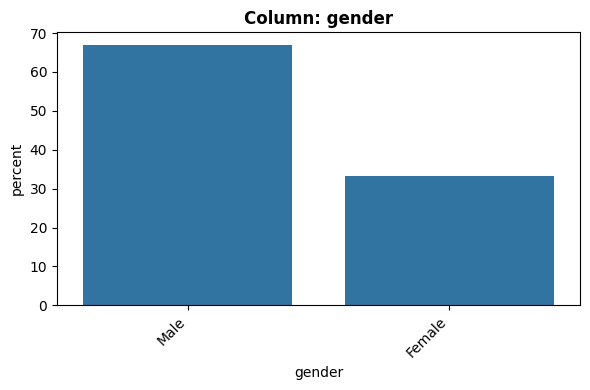

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Male' occurs 32650 times (66.85%)
- Not constant or quasi-constant.
********************Visualize native-country********************



/tmp/ipython-input-8-933707171.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


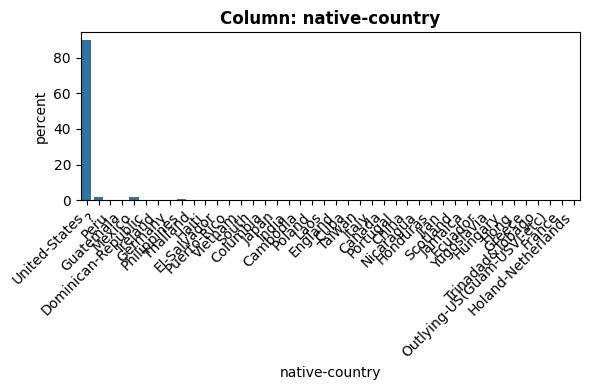

- NaN's Found: 0 (0.0%)
- Unique Values: 42
- Most common value: 'United-States' occurs 43832 times (89.74%)
- Not constant or quasi-constant.
********************Visualize income********************



/tmp/ipython-input-8-933707171.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


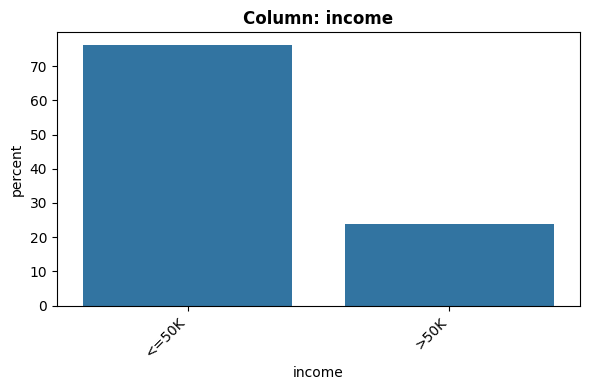

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '<=50K' occurs 37155 times (76.07%)
- Not constant or quasi-constant.


In [ ]:
for cat_col in test_cats:
  print(f'********************Visualize {cat_col}********************\n')
  explore_categorical(df,cat_col,hue=None)
# most of adults work in Private jobs
# most have HS-grad > some-collage > Bachelors
# majority are civilian (not military) married > never married > Divorced
# most are white people
# most are males
# most are from united states

### Visualize numerical

In [ ]:
test_nums=df.select_dtypes(include='number').columns

********************Visualize age********************



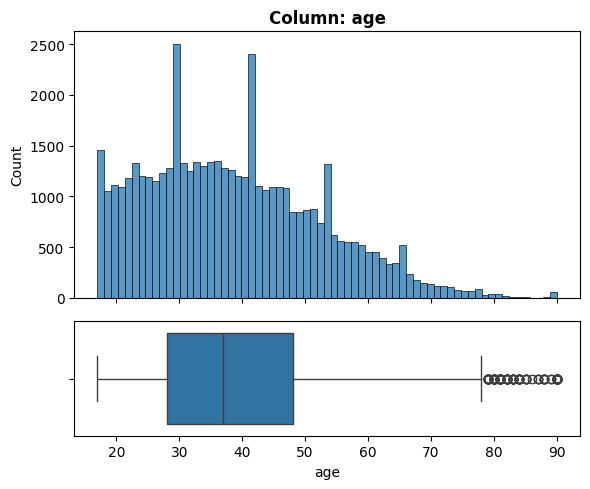

- NaN's Found: 0 (0.0%)
- Unique Values: 74
- Most common value: '36' occurs 1348 times (2.76%)
- Not constant or quasi-constant.
********************Visualize fnlwgt********************



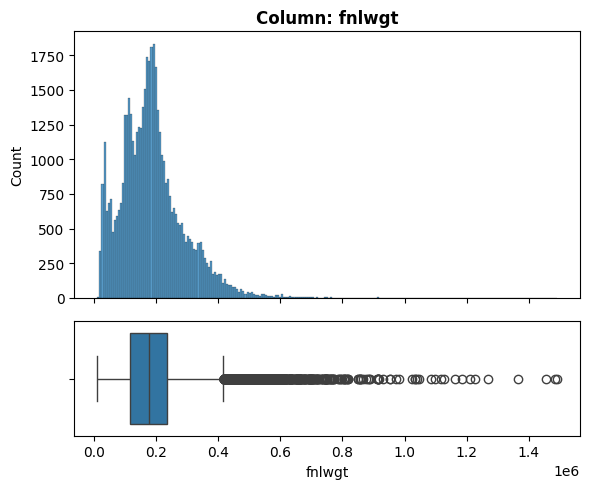

- NaN's Found: 0 (0.0%)
- Unique Values: 28523
- Most common value: '203488' occurs 21 times (0.04%)
- Not constant or quasi-constant.
********************Visualize educational-num********************



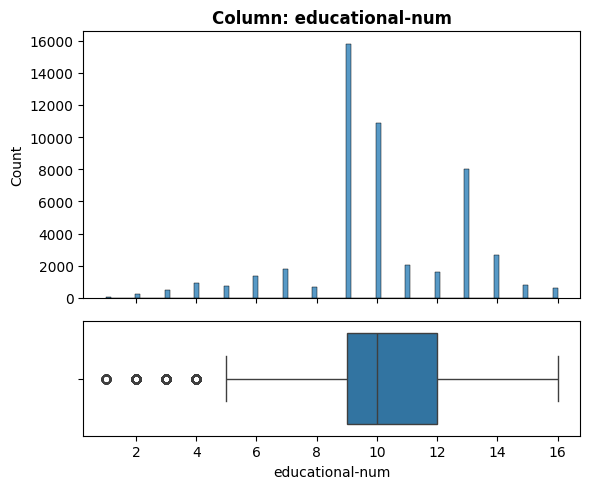

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: '9' occurs 15784 times (32.32%)
- Not constant or quasi-constant.
********************Visualize capital-gain********************



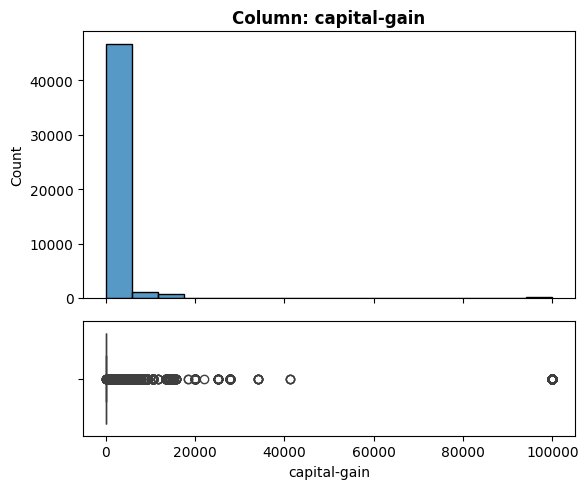

- NaN's Found: 0 (0.0%)
- Unique Values: 123
- Most common value: '0' occurs 44807 times (91.74%)
- Not constant or quasi-constant.
********************Visualize capital-loss********************



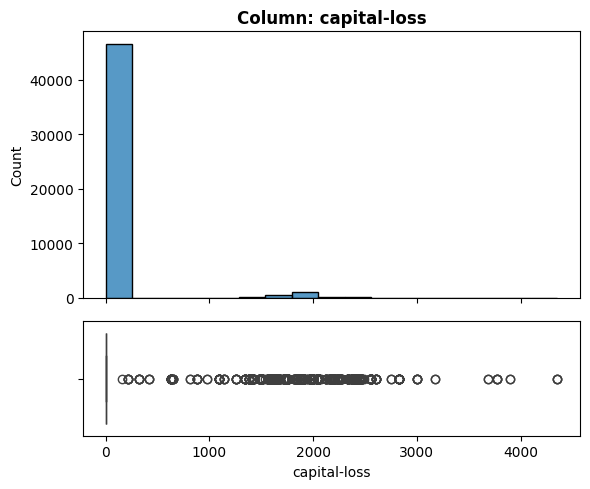

- NaN's Found: 0 (0.0%)
- Unique Values: 99
- Most common value: '0' occurs 46560 times (95.33%)
- Not constant or quasi-constant.
********************Visualize hours-per-week********************



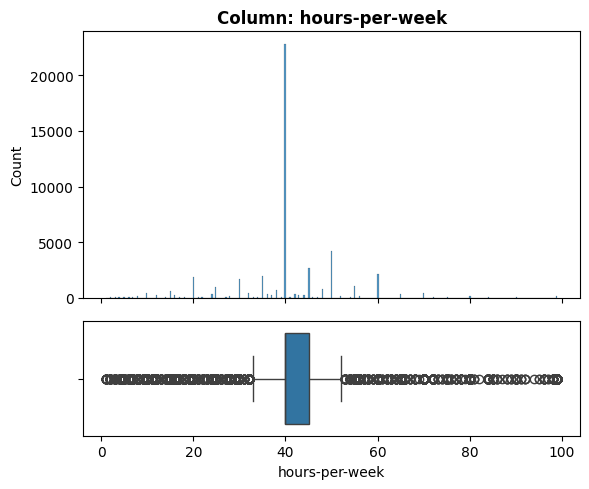

- NaN's Found: 0 (0.0%)
- Unique Values: 96
- Most common value: '40' occurs 22803 times (46.69%)
- Not constant or quasi-constant.


In [ ]:
for num_col in test_nums:
  print(f'********************Visualize {num_col}********************\n')
  explore_numeric(df,num_col)
# range of adults are 30-50 (who are 30 is more , after it come 50)
# fnlwgt (ex:fnlwgt=148780 , means the person represent 148780 similar people in U.S. population)  بمثل 148780 شخص شبهه
# most of persons in data  have fnlwgt (17k-23k)

## Preproccessing Data

In [ ]:
y=df['income']
X=df.drop(columns=['income'])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
num_cols=X_train.select_dtypes(include='number').columns
impute_median=SimpleImputer(strategy='median')
scaler=StandardScaler()
num_pipe=make_pipeline(impute_median,scaler)
num_tuple=('Numaric',num_pipe,num_cols)

cat_cols=X_train.select_dtypes(include='object').columns
impute_Na=SimpleImputer(strategy='constant',fill_value='MissingValue')
ohe=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
cat_pipe=make_pipeline(impute_Na,ohe)
cat_tuple=('Categorical',cat_pipe,cat_cols)

preprocessor=ColumnTransformer(transformers=[num_tuple,cat_tuple],verbose_feature_names_out=False)

### classification Metrices

In [ ]:
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOTS
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  # Adjust layout and show figure
  fig.tight_layout()
  plt.show()
  # Return dictionary of classification_report
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict

In [ ]:
def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

### Model (randomForestClassifier)

In [ ]:
df['income'].value_counts(normalize=True)
# there is imbalance here , so we have to handle it using SMOTE

,proportion
income,
<=50K,0.760718
>50K,0.239282


In [ ]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)
smote=SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_processed, y_train)


In [ ]:
pd.Series(y_resampled).value_counts(normalize=True)
# NOW data is balanced , we can work on models

,proportion
income,
<=50K,0.5
>50K,0.5


----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       1.00      1.00      1.00     29676
        >50K       1.00      1.00      1.00     29676

    accuracy                           1.00     59352
   macro avg       1.00      1.00      1.00     59352
weighted avg       1.00      1.00      1.00     59352



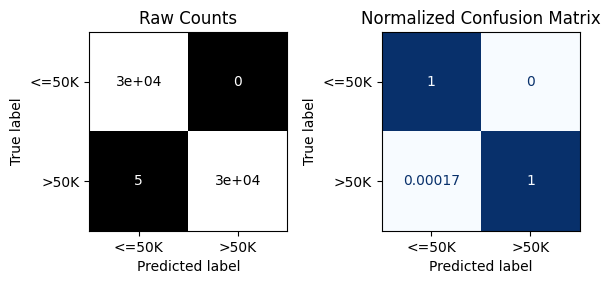


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.90      0.86      0.88      7479
        >50K       0.59      0.68      0.64      2290

    accuracy                           0.82      9769
   macro avg       0.75      0.77      0.76      9769
weighted avg       0.83      0.82      0.82      9769



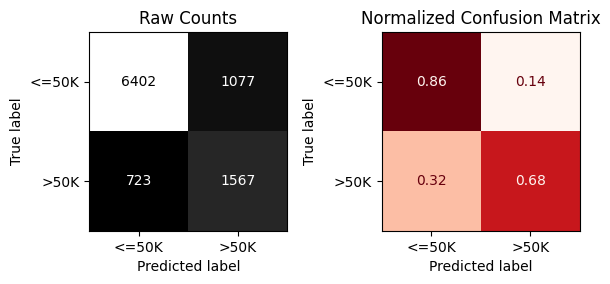

In [ ]:
class_tree=DecisionTreeClassifier(random_state=42)
class_tree.fit(X_resampled,y_resampled)
y_pred = class_tree.predict(X_test_processed)
evaluate_classification(class_tree,X_resampled,y_resampled,X_test_processed,y_test)

In [ ]:
class_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [ ]:
gird_params={'max_depth':[1,2,3,4,5,6,7,8,9,10]}
grid_search_class_tree=GridSearchCV(class_tree,gird_params,cv=5)
grid_search_class_tree.fit(X_resampled,y_resampled)
best_model=grid_search_class_tree.best_estimator_

************************** before grid search**************************
----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       1.00      1.00      1.00     29676
        >50K       1.00      1.00      1.00     29676

    accuracy                           1.00     59352
   macro avg       1.00      1.00      1.00     59352
weighted avg       1.00      1.00      1.00     59352



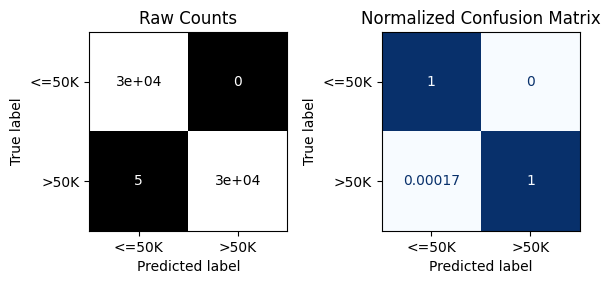


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.90      0.86      0.88      7479
        >50K       0.59      0.68      0.64      2290

    accuracy                           0.82      9769
   macro avg       0.75      0.77      0.76      9769
weighted avg       0.83      0.82      0.82      9769



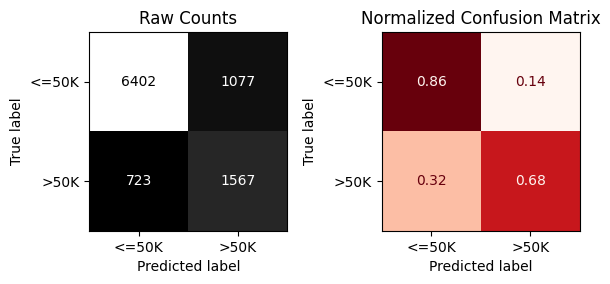


***************************************************************************************************

************************** after grid search**************************
----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.91      0.80      0.85     29676
        >50K       0.82      0.92      0.87     29676

    accuracy                           0.86     59352
   macro avg       0.87      0.86      0.86     59352
weighted avg       0.87      0.86      0.86     59352



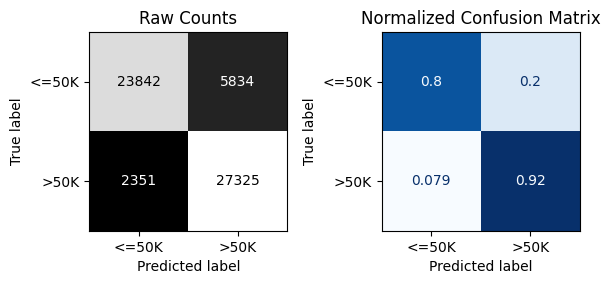


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.94      0.80      0.86      7479
        >50K       0.56      0.84      0.67      2290

    accuracy                           0.81      9769
   macro avg       0.75      0.82      0.77      9769
weighted avg       0.85      0.81      0.82      9769



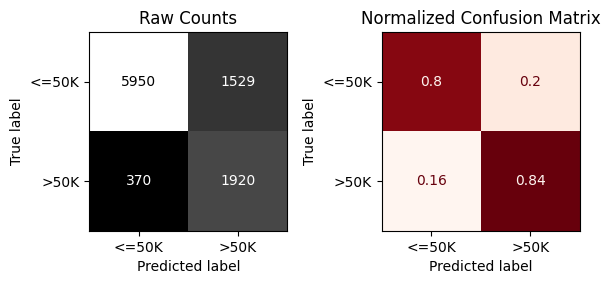

In [ ]:
print('************************** before grid search**************************')
evaluate_classification(class_tree,X_resampled,y_resampled,X_test_processed,y_test)
print('\n***************************************************************************************************\n')
print('************************** after grid search**************************')
evaluate_classification(best_model,X_resampled,y_resampled,X_test_processed,y_test)

- before grid search  there was an overfitting ,
- but also after grid search  

In [ ]:
# result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
feature_names = preprocessor.get_feature_names_out()
result = permutation_importance(best_model, X_test_processed, y_test, n_repeats=10, random_state=42)
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': result.importances_mean
}).sort_values(by='importance', ascending=False)

importance_df.head(10)

,feature,importance
33,marital-status_Married-civ-spouse,0.076886
2,educational-num,0.074143
3,capital-gain,0.032317
24,education_Bachelors,0.014945
0,age,0.013737
30,education_Some-college,0.005302
5,hours-per-week,0.004637
27,education_Masters,0.003808
46,occupation_Other-service,0.003276
4,capital-loss,0.002958


these features matches with the world expectations when predicting wheather person's income exceeds $50k

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


/tmp/ipython-input-9-1167870371.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'marital-status vs. income'}, xlabel='marital-status', ylabel='income'>)

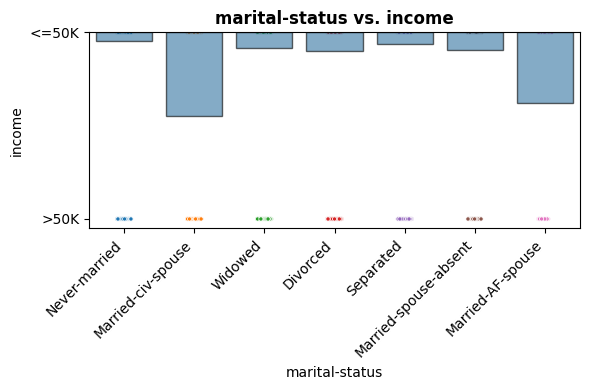

In [ ]:
most_important=['marital-status','educational-num']#object ,int64
plot_categorical_vs_target(df,most_important[0],'income')


pepole who are marrid-civilian are more liekly to earn more than $50k

/tmp/ipython-input-9-1167870371.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'educational-num vs. income'}, xlabel='educational-num', ylabel='income'>)

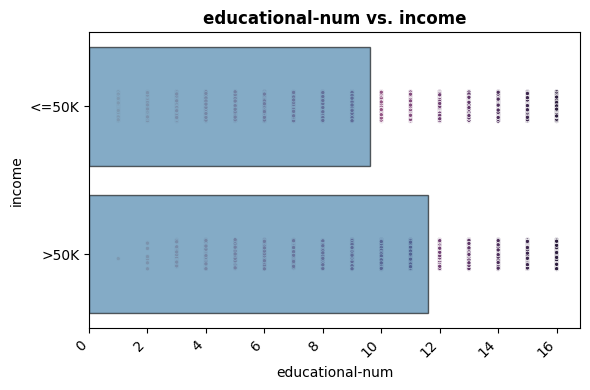

In [ ]:
plot_categorical_vs_target(df,most_important[1],'income')

persons with higher education are much likly to earn more than $50k

In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA with 3 components
pca = PCA(n_components=3, random_state=42)

# Fit and transform PCA on the processed training data
X_train_pca = pca.fit_transform(X_train_processed)

# Transform the processed test data
X_test_pca = pca.transform(X_test_processed)

# Convert PCA results to DataFrames for easier concatenation
X_train_pca_df = pd.DataFrame(X_train_pca, index=X_train.index, columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])])
X_test_pca_df = pd.DataFrame(X_test_pca, index=X_test.index, columns=[f'PC{i+1}' for i in range(X_test_pca.shape[1])])

# Concatenate PCA components with original features
X_train_combined = pd.concat([X_train, X_train_pca_df], axis=1)
X_test_combined = pd.concat([X_test, X_test_pca_df], axis=1)

# Display the first few rows of the combined dataframes
print("Combined Training Data:")
display(X_train_combined.head())
print("\nCombined Test Data:")
display(X_test_combined.head())

Combined Training Data:


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,PC1,PC2,PC3
37193,42,Private,145175,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,0.440222,-0.545886,-0.101896
31093,52,Self-emp-not-inc,175029,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,35,United-States,0.114312,-2.105130,-0.323524
33814,34,Local-gov,172664,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0.093070,-0.636771,-0.108947
14500,28,Private,125791,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,-1.189065,0.301764,-0.048926
23399,46,Private,28419,Assoc-voc,11,Never-married,Transport-moving,Not-in-family,White,Male,0,0,50,United-States,0.598493,-0.009319,-0.018406



Combined Test Data:


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,PC1,PC2,PC3
7762,56,Private,33115,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,0,40,United-States,0.095432,-1.283168,-0.242749
23881,25,Private,112847,HS-grad,9,Married-civ-spouse,Transport-moving,Own-child,Other,Male,0,0,40,United-States,-0.648674,-0.086971,-0.040921
30507,43,Private,170525,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,14344,0,40,United-States,0.900144,1.397955,-1.155872
28911,32,Private,186788,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,-0.088105,-0.495367,-0.098721
19484,39,Private,277886,Bachelors,13,Married-civ-spouse,Sales,Wife,White,Female,0,0,30,United-States,-0.101092,0.862495,-0.038653


Clustering

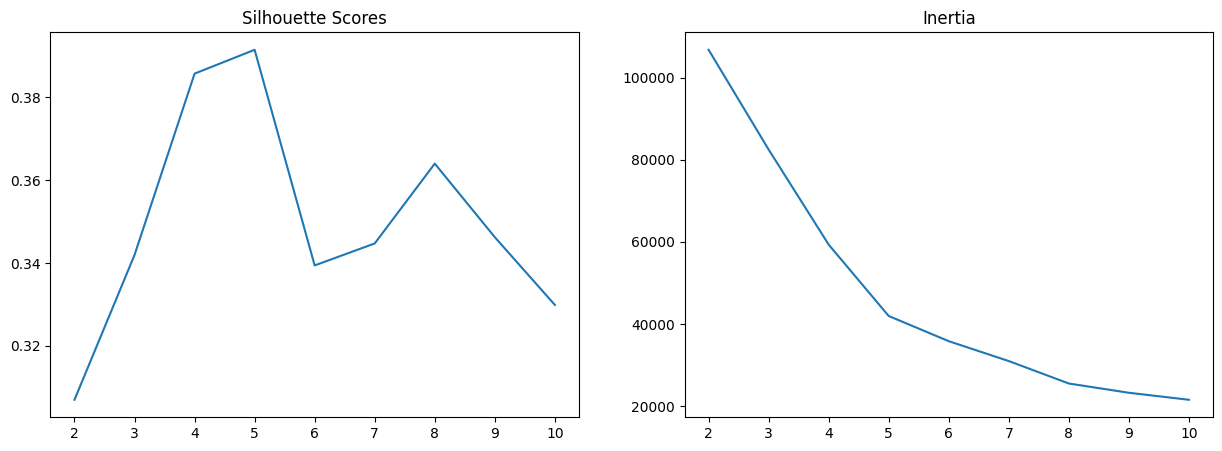

In [ ]:
# Iterate over a range of k clusters to find the optimal number of clusters
ks = range(2,11)
sils = []
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters=k, n_init = 'auto', random_state=42)
  kmeans.fit(X_train_pca)
  sils.append(silhouette_score(X_train_pca, kmeans.labels_))
  inertias.append(kmeans.inertia_)
#plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(ks, sils)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

in both silhouette , inertia shows that 5 is the best number for clustering

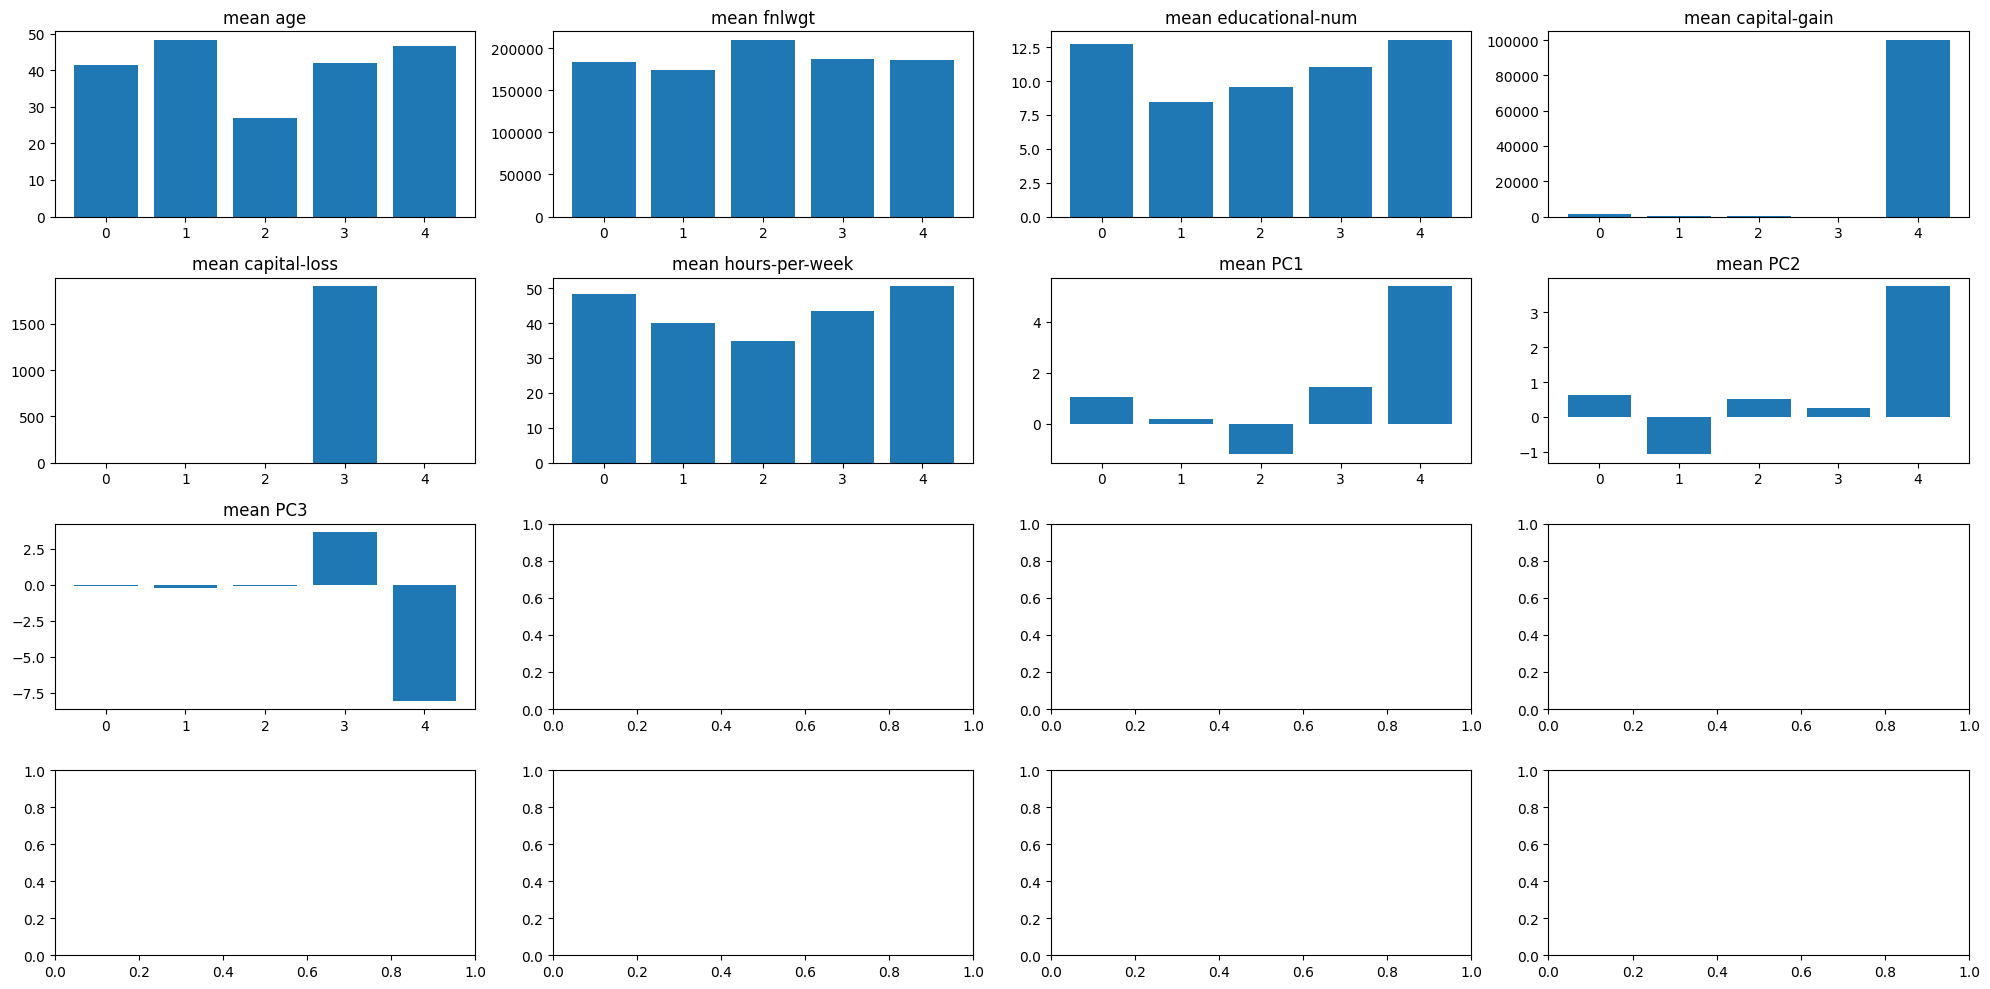

In [ ]:
# Refit KMeans with 5 clusters
kmeans = KMeans(n_clusters=5, n_init= 'auto', random_state=42)

# Fit on the PCA-transformed training data
kmeans.fit(X_train_pca)

# Get cluster labels for both training and test data
train_clusters = kmeans.labels_
test_clusters = kmeans.predict(X_test_pca)

# Add the clusters as a column in the training and test dataframes
X_train_combined['cluster'] = train_clusters
X_test_combined['cluster'] = test_clusters

# Concatenate the training and test dataframes back to the original dataframe
# Make sure to keep the original index for correct alignment
df_clustered = pd.concat([X_train_combined, X_test_combined])

# *********************************************************************************
# Group the dataframe by cluster and aggregate by mean values
# Add as_index=False so that the clusters are a column, not the index
cluster_groups = df_clustered.groupby('cluster', as_index=False).mean(numeric_only=True)
# *********************************************************************************
# Visualize means
fig, axes = plt.subplots(4,4, figsize = (20, 10))
# fig is an array of dimensions 3,4.  axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  # if col == ''
    axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
    axes[i].set_title(f'mean {col}')
plt.tight_layout() # Added to prevent overlapping titles
plt.show()


/tmp/ipython-input-8-933707171.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipython-input-8-933707171.py:29: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


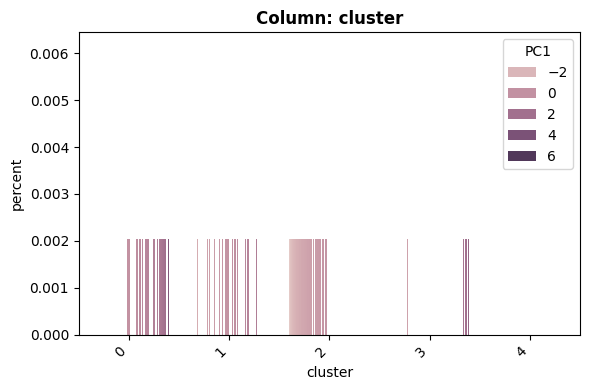

- NaN's Found: 0 (0.0%)
- Unique Values: 5
- Most common value: '2' occurs 17284 times (35.39%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: cluster'}, xlabel='cluster', ylabel='percent'>)

In [ ]:
explore_categorical(df_clustered, x='cluster', hue='PC1',fillna=False)


In [ ]:
feature_names = preprocessor.get_feature_names_out()
result = permutation_importance(df_clustered, X_test_pca, y_test, n_repeats=10, random_state=42)
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': result.importances_mean
}).sort_values(by='importance', ascending=False)

display(importance_df.head(10))